# Regression Check-in

In [2]:
# Installing scikit-lego package
%pip install scikit-lego
%pip install plotly
%pip install matplotlib
%pip install pandas
%pip install xlrd


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklego.linear_model import LADRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [4]:
# load the happiness data in file WHR2018Chapter2OnlineData.xls
# Upload this file using the folder to left

df = pd.read_csv("pop_genres_cleaned_dataset.csv")

# Milliseconds to seconds
df["duration_ms"] = df["duration_ms"] / 1000
df = df.rename(columns={"duration_ms": "duration_s"})

df = pd.get_dummies(df, columns=["track_genre"])

df.head()

,artists,track_name,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_cantopop,track_genre_indie-pop,track_genre_j-pop,track_genre_k-pop,track_genre_mandopop,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_synth-pop
0,my little airport,每次你走的時分,47,183.968,0,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4,True,False,False,False,False,False,False,False,False
1,my little airport,下了兩天雨,44,172.343,0,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4,True,False,False,False,False,False,False,False,False
2,my little airport,詩歌舞街,50,191.308,0,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4,True,False,False,False,False,False,False,False,False
3,my little airport,那陣時不知道,48,148.564,0,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4,True,False,False,False,False,False,False,False,False
4,Eason Chan,無條件,54,228.973,0,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4,True,False,False,False,False,False,False,False,False


In [ ]:
# Examine missingness
df_cleaned = df.dropna()

missingness_percent = df_cleaned.isnull().mean() * 100  # or .isna()
missingness_percent = missingness_percent.sort_values(ascending=False)
missingness_df = missingness_percent.reset_index()
missingness_df.columns = ['variable', 'percent_missing']
print(missingness_df)



                 variable  percent_missing
0                 artists              0.0
1              track_name              0.0
2              popularity              0.0
3              duration_s              0.0
4                explicit              0.0
5            danceability              0.0
6                  energy              0.0
7                     key              0.0
8                loudness              0.0
9                    mode              0.0
10            speechiness              0.0
11           acousticness              0.0
12       instrumentalness              0.0
13               liveness              0.0
14                valence              0.0
15                  tempo              0.0
16         time_signature              0.0
17   track_genre_cantopop              0.0
18  track_genre_indie-pop              0.0
19      track_genre_j-pop              0.0
20      track_genre_k-pop              0.0
21   track_genre_mandopop              0.0
22        t

            variable  correlation_coefficient  abs_corr
2       danceability                 0.134323  0.134323
0         duration_s                 0.130424  0.130424
5           loudness                 0.096993  0.096993
6               mode                -0.073386  0.073386
7        speechiness                 0.070599  0.070599
12             tempo                -0.059012  0.059012
10          liveness                -0.058444  0.058444
8       acousticness                 0.051304  0.051304
9   instrumentalness                -0.042766  0.042766
13    time_signature                 0.041155  0.041155
11           valence                -0.018615  0.018615
3             energy                 0.011285  0.011285
4                key                 0.010498  0.010498
1           explicit                 0.005215  0.005215

Top predictors: ['danceability', 'duration_s', 'loudness']


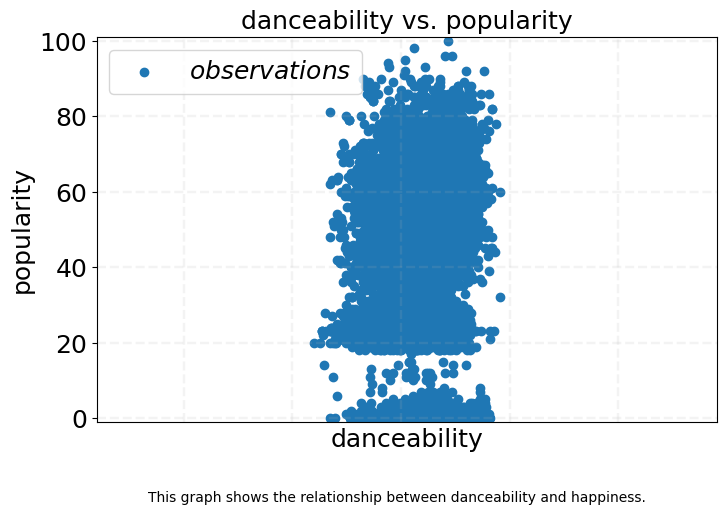

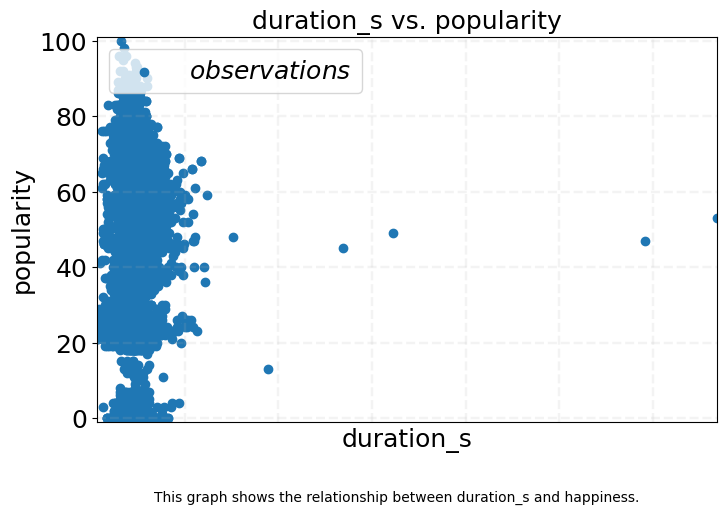

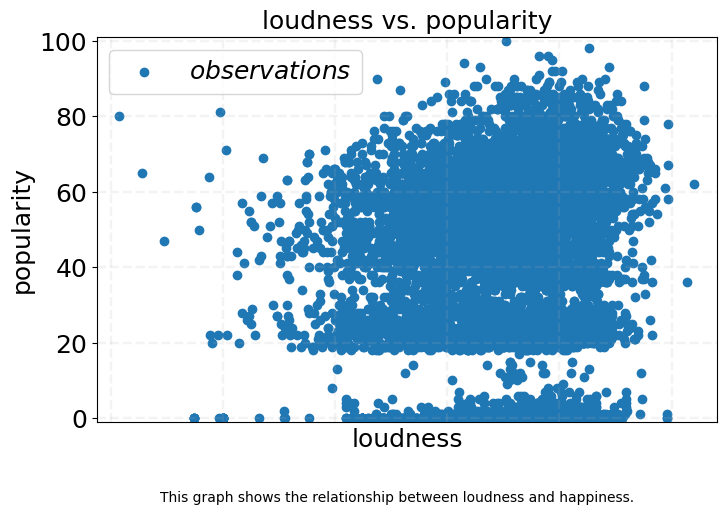

In [16]:
h = df_cleaned.copy()
potential_preds = h.select_dtypes(include=[np.number]).columns.tolist()
potential_preds = [c for c in potential_preds if c not in ['artist','track_name', 'popularity']]

correlations = h[potential_preds + ['popularity']].corr()['popularity'].drop('popularity')
correlations_df = correlations.reset_index()
correlations_df.columns = ['variable','correlation_coefficient']
correlations_df['abs_corr'] = correlations_df['correlation_coefficient'].abs()

correlations_df = correlations_df.sort_values('abs_corr', ascending=False)
print(correlations_df)


top3 = correlations_df.head(3)['variable'].tolist()
for var in top3:
    f_size = 18

    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(h[var])-1, np.max(h[var]) + 1)
    ax.set_ylim(np.min(h['popularity'])-1, np.max(h['popularity']) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)

    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)

    # adjust size of axis label
    ax.set_xlabel(var, fontsize = f_size)
    ax.set_ylabel('popularity', fontsize = f_size)

    # set figure title label
    ax.set_title(var + " vs. popularity", fontsize = f_size)

    # you may set up grid with this
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    ax.scatter(h[var], h['popularity'], label=r'$observations$')
    ax.legend(loc='upper left', fontsize = f_size)
    plt.figtext(0.5, -0.05, 
            f"This graph shows the relationship between {var} and happiness.",
            wrap=True, horizontalalignment='center', fontsize=10)

   
print('\nTop predictors:', top3)

In [26]:
df_popularity = df_cleaned[["artists", "track_name", "popularity", "danceability"]]
X = df_popularity.drop(["popularity"], axis=1)
y = df_popularity["popularity"]
train_df, val_df = train_test_split(df_popularity, test_size=0.2, random_state=42)

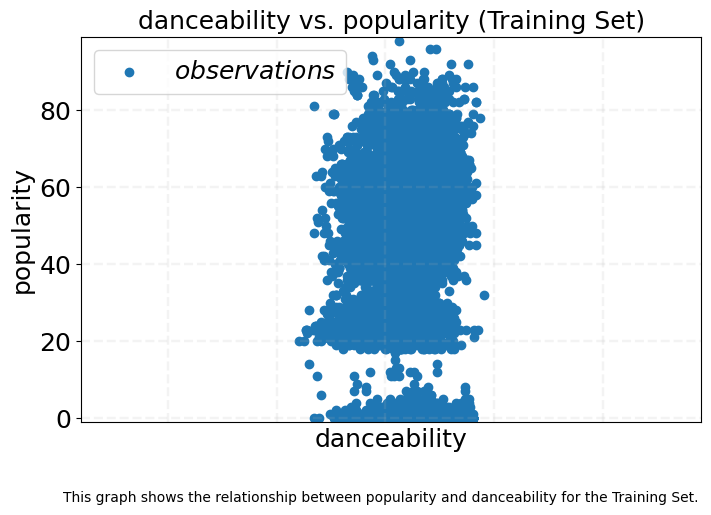

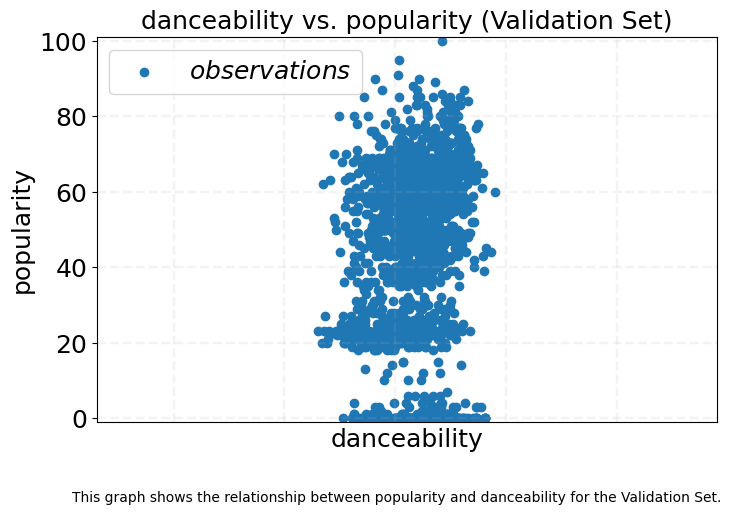

In [27]:
predictor = 'danceability'


for df, name in zip((train_df, val_df), ("Training Set", "Validation Set")):
    f_size = 18

    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(df[predictor])-1, np.max(df[predictor]) + 1)
    ax.set_ylim(np.min(df['popularity'])-1, np.max(df['popularity']) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)

    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)

    # adjust size of axis label
    ax.set_xlabel(predictor, fontsize = f_size)
    ax.set_ylabel('popularity', fontsize = f_size)

    # set figure title label
    ax.set_title(f"{predictor} vs. popularity ({name})", fontsize = f_size)

    # you may set up grid with this
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    ax.scatter(df[predictor], df['popularity'], label=r'$observations$')
    ax.legend(loc='upper left', fontsize = f_size)
    plt.figtext(0.5, -0.05, 
            f"This graph shows the relationship between popularity and danceability for the {name}.",
            wrap=True, horizontalalignment='center', fontsize=10)


In [29]:
# 1. Train LAD model on your training Set
# 2. Get the parameters of your model to write formula
# 3. Train LS model on your training Set
# 4. Get the parameters of your model to write formula
# 5. Create a scatterplot of happiness vs your predictor variable
#    with a line for each model

px.scatter(train_df, x=predictor, y='popularity',
           title=f'popularity vs {predictor} (Training Set)',
           labels={predictor: predictor, 'popularity': 'popularity'},
           opacity=0.7)

lad_fit = LADRegression()
lad_fit.fit(X=np.array(train_df[predictor]).reshape(-1, 1),
            y=train_df['popularity'])
print(f"LAD model: intercept: {lad_fit.intercept_}, slope: {lad_fit.coef_[0]}")

fig = px.scatter(train_df, x=predictor, y='popularity', title="popularity vs danceability (Training Set)",
)
fig.add_trace(
    go.Scatter(x=train_df[predictor],
               y=lad_fit.intercept_ + train_df[predictor] * lad_fit.coef_[0],
               mode='lines',
               name='LAD',
               line={'dash': 'dash',
                     'color': 'orange'})
)

ls_fit = LinearRegression()
ls_fit.fit(X=np.array(train_df[predictor]).reshape(-1, 1),
                y=train_df['popularity'])
print(f"LS model: intercept: {ls_fit.intercept_}, slope: {ls_fit.coef_[0]}")

fig.add_trace(
    go.Scatter(x=train_df[predictor],
               y=ls_fit.intercept_ + train_df[predictor] * ls_fit.coef_[0],
               mode='lines',
               name='LS',
               line={'dash': 'solid',
                     'color': 'green'})
)

fig.add_annotation(
    text="Regression Lines: LAD (dashed orange), LS (solid green) - Predicting popularity from danceability",
    xref="paper", yref="paper",
    x=0.5, y=-0.25,  
    showarrow=False,
    font=dict(size=12),
    align="center"
)

fig.show()


LAD model: intercept: 22.304347826022976, slope: 43.4782608696354
LS model: intercept: 30.391989474861276, slope: 22.182693932853358


/opt/miniconda3/lib/python3.12/site-packages/sklego/linear_model.py:1358: UserWarning:

Please consider using scikit-learn version of quantile regression.

Hint: `from sklearn.linear_model import QuantileRegressor`
Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html



Sever Underfitting on the Model

In [30]:
# Create a  3 column dataframe that for each point in your validation set
# contains the actual observed happiness score, the happiness score predicted
# from LAD, and the happiness score predicted from LS

pred_val_df = pd.DataFrame(
    {'true': val_df['popularity'],
     'lad_pred': lad_fit.predict(np.array(val_df[predictor]).reshape(-1, 1)),
     'ls_pred': ls_fit.predict(np.array(val_df[predictor]).reshape(-1, 1)) 
    }
)
#pred_val_df = pred_val_df.reset_index(drop=True)

pred_val_df.head()

,true,lad_pred,ls_pred
3688,47,55.260870,47.206471
5710,60,49.826087,44.433635
2954,47,35.826087,37.290807
7138,33,38.434783,38.621769
676,19,38.260870,38.533038


In [35]:
lad_fig = px.scatter(pred_val_df, x='true', y='lad_pred')
# add a line with slope 1 and intercept 0; this would be a perfect prediction, y=x
lad_fig.add_trace(
    go.Scatter(x=[0, 100], y=[0, 100], mode='lines'))
# update axes names and ranges
lad_fig.update_layout(xaxis_title='Observed Popularity',
                        yaxis_title='Predicted Popularity',
                        title="LAD pred",
                        xaxis_range=[0, 100],
                        yaxis_range=[0, 100])
lad_fig.add_annotation(
    text="This graph shows Observed Popularity vs. LAD Predicted Popularity",
    xref="paper", yref="paper",
    x=0.5, y=-0.25,  
    showarrow=False,
    font=dict(size=12),
    align="center"
)
lad_fig.show()



In [36]:
ls_fig = px.scatter(pred_val_df, x='true', y='ls_pred')
# add a line with slope 1 and intercept 0; this would be a perfect prediction, y=x
ls_fig.add_trace(
    go.Scatter(x=[0, 100], y=[0, 100], mode='lines'))
# update axes names and ranges
ls_fig.update_layout(xaxis_title='Observed Popularity',
                     yaxis_title='Predicted Popularity',
                     title="LS pred",
                     xaxis_range=[0, 100],
                     yaxis_range=[0, 100])
ls_fig.add_annotation(
    text="This graph shows Observed Happiness vs. LS Predicted Happiness",
    xref="paper", yref="paper",
    x=0.5, y=-0.25, 
    showarrow=False,
    font=dict(size=12),
    align="center"
)
ls_fig.show()


In [37]:
# Write code in this cell to calculate and print
# the rMSE, MAE, MAD, correlation, and R2 of
# the true happiness with the LS and LAD predictions

print('LS rMSE:', np.sqrt(mean_squared_error(pred_val_df['true'], pred_val_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_val_df['true'], pred_val_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_val_df['true'] - pred_val_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_val_df['true'], pred_val_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_val_df['true'], pred_val_df['ls_pred']))

print('LAD rMSE:', np.sqrt(mean_squared_error(pred_val_df['true'], pred_val_df['lad_pred'])))
print('LAD MAE:', mean_absolute_error(pred_val_df['true'], pred_val_df['lad_pred']))
print('LAD MAD:', np.median(np.abs(pred_val_df['true'] - pred_val_df['lad_pred'])))
print('LAD correlation:', np.corrcoef(pred_val_df['true'], pred_val_df['lad_pred'])[0, 1])
print('LAD R2:', r2_score(pred_val_df['true'], pred_val_df['lad_pred']))



LS rMSE: 23.379946748789006
LS MAE: 19.58258208448317
LS MAD: 17.974259760023948
LS correlation: 0.13246941071464047
LS R2: 0.017417128036721796
LAD rMSE: 24.004435654827564
LAD MAE: 19.12041062801922
LAD MAD: 16.04347826089456
LAD correlation: 0.13246941071464044
LAD R2: -0.03577435586856925


In [43]:
X = df_popularity.drop(columns=['popularity'])
# Drop non-numeric columns
X = df_popularity.drop(columns=['popularity'])
# Keep only numeric columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X = X[numeric_columns]

X_std = (X - X.mean()) / X.std()
y = df_popularity['popularity']


In [44]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_validate

# use 10-fold cross-validation to select the best lambda (alpha) value for the ridge regression model

# define the alpha values to test
# note that the start/stop values in the first two arguments are the exponents
alphas = np.logspace(-1, 6, 100)

# create an empty list to store the cross-validation scores
ridge_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_cv = cross_validate(estimator=ridge,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    ridge_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(ridge_cv['test_score'])})

# convert the cross-validation scores into a data frame
ridge_cv_scores_df = pd.DataFrame(ridge_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(ridge_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Ridge')

In [45]:
ridge_cv_scores_df

,alpha,log_alpha,test_mse
0,0.100000,-2.302585,22.655713
1,0.117681,-2.139776,22.655713
2,0.138489,-1.976967,22.655712
3,0.162975,-1.814158,22.655712
4,0.191791,-1.651349,22.655712
5,0.225702,-1.488540,22.655712
6,0.265609,-1.325731,22.655712
7,0.312572,-1.162922,22.655712
8,0.367838,-1.000113,22.655712
9,0.432876,-0.837304,22.655712


In [46]:
# use 10-fold cross-validation to select the best lambda (alpha) value for the lasso regression model

# define the alpha values to test
# note that the start/stop values in the first two arguments are the exponents
alphas = np.logspace(-1, 4, 100)

# create an empty list to store the cross-validation scores
lasso_cv_scores = []

# create a for loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso_cv = cross_validate(estimator=lasso,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error',
                              return_indices=True)
    lasso_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'test_mse': -np.mean(lasso_cv['test_score'])})

# convert the cross-validation scores into a data frame
lasso_cv_scores_df = pd.DataFrame(lasso_cv_scores)

# plot the cross-validation scores as a function of alpha
px.line(lasso_cv_scores_df,
        x='log_alpha',
        y='test_mse',
        title='Lasso')

In [47]:

# identify the value of alpha that minimizes the cross-validation score for ridge
ridge_alpha_min = ridge_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_ridge = ridge_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_ridge = ridge_cv_scores_df['test_mse'].min()


# identify the value of alpha that minimizes the cross-validation score for ridge within 1SE
ridge_alpha_1se = ridge_cv_scores_df[(ridge_cv_scores_df['test_mse'] <= mse_min_ridge + mse_se_ridge) &
                                     (ridge_cv_scores_df['test_mse'] >= mse_min_ridge - mse_se_ridge)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]


# identify the value of alpha that minimizes the cross-validation score for lasso
lasso_alpha_min = lasso_cv_scores_df.sort_values(by='test_mse').head(1).alpha.values[0]
# compute the min MSE and the SE of the MSE
mse_se_lasso = lasso_cv_scores_df['test_mse'].std() / np.sqrt(10)
mse_min_lasso = lasso_cv_scores_df['test_mse'].min()

# identify the value of alpha that minimizes the cross-validation score for lasso within 1SE
lasso_alpha_1se = lasso_cv_scores_df[(lasso_cv_scores_df['test_mse'] <= mse_min_lasso + mse_se_lasso) &
                                     (lasso_cv_scores_df['test_mse'] >= mse_min_lasso - mse_se_lasso)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]


In [48]:
# use ridge_alpha_min to fit the ridge regression model
ridge_min_fit = Ridge(alpha=ridge_alpha_min).fit(X=X_std, y=y)
ridge_1se_fit = Ridge(alpha=ridge_alpha_1se).fit(X=X_std, y=y)

# use lasso_alpha_min to fit the lasso regression model
lasso_min_fit = Lasso(alpha=lasso_alpha_min).fit(X=X_std, y=y)
lasso_1se_fit = Lasso(alpha=lasso_alpha_1se).fit(X=X_std, y=y)

In [49]:
ridge_1se_fit.coef_

array([2.03613506])

In [50]:
lasso_1se_fit.coef_

array([2.57699825])

In [51]:
print('Ridge (min): ', ridge_alpha_min)
print('Ridge (1SE): ', ridge_alpha_1se)
print('Lasso (min): ', lasso_alpha_min)
print('Lasso (1SE): ', lasso_alpha_1se)

Ridge (min):  475.0810162102793
Ridge (1SE):  4641.588833612773
Lasso (min):  0.1
Lasso (1SE):  0.509413801481638


In [52]:

ridge = Ridge(alpha = 1)
ridge.fit(X, y)
ridge_pred = ridge.predict(X)

print("R²:", r2_score(y, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, ridge_pred)))
print("MAE:", mean_absolute_error(y, ridge_pred))

R²: 0.018042187387399045
RMSE: 22.768396891722443
MAE: 18.971030421279295


There's no sign of improvement with ridge regression - in fact, the R^2 value is slightly less than linear regression. This is due to the fact that regularization penalizes complexity to prevent overfitting. Since the initial model was already simple, adding the penalty further restricted the model from fitting the data.